# 1. Train test split

In [ ]:
import sys
sys.path.append('../../')
import pandas as pd
from SynTemp.SynUtils.utils import load_database, save_database, train_val_test_split_df
data = pd.DataFrame(load_database('../../Data/DPO/USPTO_50K/USPTO_50K_aam_reactions.json.gz'))
original_data = pd.read_csv('../../Data/USPTO_50K/USPTO_50K_original.csv')

data = pd.concat([data, original_data['class']], axis=1)

In [ ]:
train_df, val_df, test_df = train_val_test_split_df(data, target='class', random_state=42)

In [ ]:
train_df.shape

In [ ]:
train_df, val_df, test_df = train_val_test_split_df(data, target='class', random_state=42)

save_database(train_df.to_dict('records'), '../../Data/DPO/USPTO_50K/train.json.gz')
save_database(val_df.to_dict('records'), '../../Data/DPO/USPTO_50K/val.json.gz')
save_database(test_df.to_dict('records'), '../../Data/DPO/USPTO_50K/test.json.gz')

# 2. Rules Writing

In [ ]:
#folder_name = 'Non_hydrogen'
folder_name = 'Good_hydrogen'
#folder_name = 'Hydrogen'

In [ ]:
import sys
sys.path.append('../../')
from SynTemp.SynUtils.utils import load_from_pickle, save_to_pickle
from SynTemp.SynUtils.graph_utils import add_child_ids 
temp = load_from_pickle(f'../../Data/DPO/USPTO_50K/{folder_name}/templates.pkl.gz')
processed_data = add_child_ids(temp)
save_to_pickle(processed_data, f'../../Data/DPO/USPTO_50K/{folder_name}/hier_rules.pkl.gz')

In [ ]:
non_h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Non_hydrogen/templates.pkl.gz')
h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Hydrogen/templates.pkl.gz')
good_h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Good_hydrogen/templates.pkl.gz')

In [ ]:
from SynTemp.SynUtils.graph_utils import check_graph_type, get_cycle_member_rings
for value in temp[0]:
    value["Reaction Type"] = check_graph_type(value["RC"][2])
    value["Rings"] = get_cycle_member_rings(value["RC"][2])


In [ ]:
from SynTemp.SynRule.rule_writing import RuleWriting
for i in range(4):
    templates = temp[i]
    if folder_name == 'Good_hydrogen':
        if i == 0:
            templates = [value for value in templates if value['Reaction Type'] in ['Single Cyclic', 'Complex Cyclic']]
            parent_id = [value['Cluster_id'] for value in templates]
        else:
            templates = [value for value in templates if value['Parent'] in parent_id]
            print(len(templates))
            parent_id = [value['Cluster_id'] for value in templates]
    
    rules = RuleWriting.auto_extraction(data_dicts=templates, id_column=f'Cluster_id', rule_column = 'RC', reindex=True,
                                        save_path=f'../../Data/DPO/USPTO_50K/{folder_name}/R{i}/'
                                        )


In [ ]:
all = [{'R0':285, 'R1': 1512, 'R2':9709, 'R3':22280},
       {'R0':266, 'R1': 1465, 'R2':9591, 'R3':22131},
       {'R0':149, 'R1': 1081, 'R2':7668, 'R3':18350}]

In [ ]:
import pandas as pd
pd.DataFrame(all)

## Templates analysis

In [1]:
import sys
sys.path.append('../../')
from SynTemp.SynUtils.utils import load_from_pickle, save_to_pickle
cluster = load_from_pickle('../../Data/DPO/USPTO_50K/Good_hydrogen/cluster.pkl.gz')

/tmp/ipykernel_2194039/2698865202.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ids[:num_bars], rotation=45, fontsize=18)


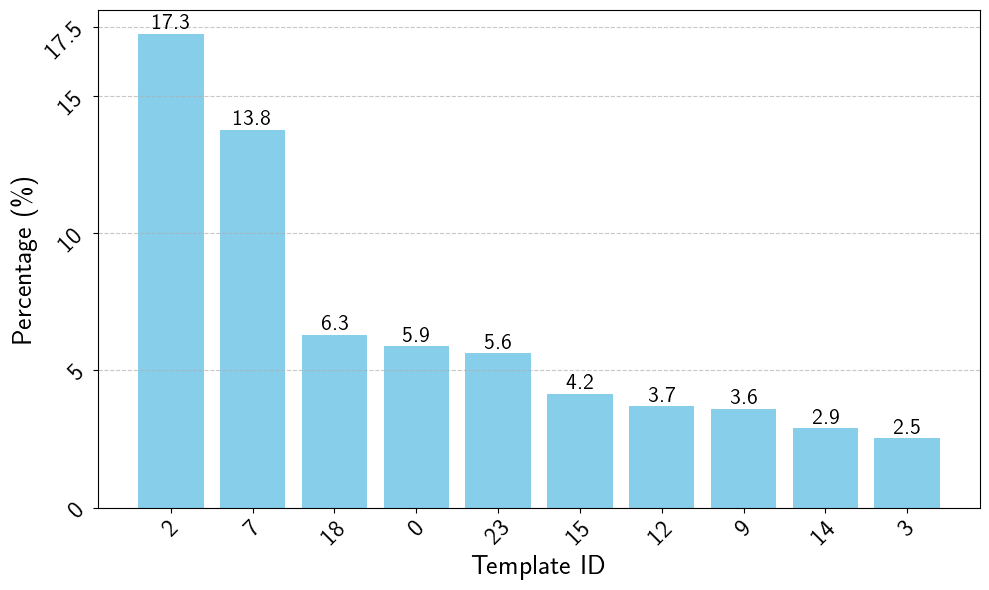

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

# Enable LaTeX rendering in matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')  # Ensure amsmath is loaded

template_ids = [value['Cluster_R0'] for value in cluster]
max_template = len(template_ids)

count_dict = Counter(template_ids)
sorted_counts = count_dict.most_common()

ids = [str(item[0]) for item in sorted_counts]
counts = [item[1] for item in sorted_counts]
percent = [100*i/max_template for i in counts]

num_bars = 10

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ids[:num_bars], percent[:num_bars], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    #percent = yval / max_template * 100
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize = 16)

ax.set_xlabel(r'Template ID', fontsize =20)
ax.set_ylabel(r'Percentage (\%)', fontsize =20)
# ax.set_title('Top 10 Most Common Template IDs')
ax.set_xticklabels(ids[:num_bars], rotation=45, fontsize=18)
ax.set_yticks([0, 5, 10, 15, 17.5])
ax.set_yticklabels([0, 5, 10, 15, 17.5], rotation=45, fontsize=18)

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./fig/Templates_distribution.pdf', dpi=600)
plt.show()


## ITS reaction type analysis

In [3]:
h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Hydrogen/templates.pkl.gz')
for value in h[0]:
    value["Reaction Type"] = check_graph_type(value["RC"][2])
    value["Rings"] = get_cycle_member_rings(value["RC"][2])

NameError: name 'check_graph_type' is not defined

In [ ]:
temp_h0 = h[0]

In [ ]:
pd.DataFrame(h[0])['Reaction Type'].value_counts()

## ITS ring analysis

In [ ]:
from SynTemp.SynUtils.graph_utils import check_graph_type, get_cycle_member_rings
good_h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Good_hydrogen/templates.pkl.gz')
for value in good_h[0]:
    value["Reaction Type"] = check_graph_type(value["RC"][2])
    value["Rings"] = get_cycle_member_rings(value["RC"][2])

temp_0 = [value for value in good_h[0] if value['Reaction Type'] in ['Single Cyclic', 'Complex Cyclic']]

In [ ]:
good_h = load_from_pickle(f'../../Data/DPO/USPTO_50K/Hydrogen/templates.pkl.gz')
for value in good_h[0]:
    value["Reaction Type"] = check_graph_type(value["RC"][2])
    value["Rings"] = get_cycle_member_rings(value["RC"][2])

In [ ]:
single = [value for value in good_h[0] if value['Reaction Type'] in ['Single Cyclic']]
complex = [value for value in good_h[0] if value['Reaction Type'] in ['Complex Cyclic']]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable LaTeX rendering in matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')  # Ensure amsmath is loaded
# Data for single rules
single_rules = {
    4: 90,
    5: 10,
    6: 16,
    7: 3
}

# Data for complex rules
complex_rules = {
    '[4, 4]': 17,
    '[4, 6]': 3,
    '[4, 5]': 3,
    '[3, 3]': 2,
    '[3, 4]': 1,
    '[5, 6]': 1,
    '[3, 3, 3]': 1,
    '[4, 5, 6]': 1,
    '[4, 4, 6]': 1,  
}

# Calculate total counts for single and complex rules
total_single = sum(single_rules.values())
total_complex = sum(complex_rules.values())

# Convert counts to percentages
single_percentages = [value / total_single * 100 for value in single_rules.values()]
complex_percentages = [value / total_complex * 100 for value in complex_rules.values()]

# Extract keys for plotting
single_types_of_rings = list(single_rules.keys())
complex_types_of_rings = list(complex_rules.keys())

# Set style
sns.set(style="whitegrid")

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), dpi=120)
fig.subplots_adjust(wspace=0.3)

# Plot for single rules
sns.barplot(ax=axes[0], x=single_types_of_rings, y=single_percentages, palette='coolwarm')
axes[0].set_title('A. Distribution of Single Rule Types of Rings', fontsize=16)
axes[0].set_xlabel('Type of Ring', fontsize=14)
axes[0].set_ylabel(r'Percentage (\%)', fontsize=14)
for index, value in enumerate(single_percentages):
    axes[0].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)

# Plot for complex rules
sns.barplot(ax=axes[1], x=complex_types_of_rings, y=complex_percentages, palette='coolwarm')
axes[1].set_title('B. Distribution of combinatorial rules Types', fontsize=16)
axes[1].set_xlabel('Type of Ring Combination', fontsize=14)
axes[1].set_ylabel(r'Percentage (\%)', fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
for index, value in enumerate(complex_percentages):
    axes[1].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)
plt.savefig('./fig/rules_ring.pdf', dpi=600)
plt.show()

# Combine figures

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Enable LaTeX rendering in matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')  # Ensure amsmath is loaded


# Create figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16), dpi=600)
fig.subplots_adjust(hspace=0.25, wspace=0.3)

# --- First row for template distribution ---
template_ids = [value['Cluster_R0'] for value in cluster]
max_template = len(template_ids)
count_dict = Counter(template_ids)
sorted_counts = count_dict.most_common()

ids = [str(item[0]) for item in sorted_counts]
counts = [item[1] for item in sorted_counts]
percent = [100 * i / max_template for i in counts]

num_bars = 10
bars = ax1.bar(ids[:num_bars], percent[:num_bars], color='#3A8EBA')
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=18)

ax1.set_xlabel(r'Template ID', fontsize=24, weight = 'medium')
ax1.set_ylabel(r'Percentage (\%)', fontsize=24, weight = 'medium')
ax1.set_xticklabels(ids[:num_bars], rotation=45, fontsize=18)
ax1.set_yticks([0, 5, 10, 15, 17.5])
ax1.set_yticklabels([0, 5, 10, 15, 17.5], fontsize=18)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_title('A. Top 10 Most Common Template IDs', fontsize=30, weight = 'bold')

# --- First row for Cyclic distribution ax2 ---
types_of_cyclization = {'Single Cyclic': 119, 'Acyclic': 60, 'None': 57, 'Complex Cyclic': 30}
names = list(types_of_cyclization.keys())
values = list(types_of_cyclization.values())

bars = ax2.bar(names, values, color = ['#3A8EBA', '#92C5DE', '#F4A582', '#D6604D'])
ax2.set_title('B. Reaction center topology distribution', fontsize=30, weight = 'bold')
ax2.set_xlabel('Topology type', fontsize=24, weight = 'medium')
ax2.set_ylabel('Count', fontsize=24, weight = 'medium')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=18)
ax2.set_yticks([0, 40, 80, 120])
ax2.set_yticklabels([0, 40, 80, 120], fontsize=18)
ax2.set_xticklabels(['Single Cyclic', 'Acyclic', 'Complex', 'Combinatorial Cyclic'],  ha="center", fontsize=18)


# --- Second row for single and complex rules distributions ---
# Data for single and complex rules assumed to be pre-defined
sns.barplot(ax=ax3, x=list(single_rules.keys()), y=[val / total_single * 100 for val in single_rules.values()], palette='coolwarm')
ax3.set_title('C. Ring shape distribution', fontsize=30, weight = 'bold')
ax3.set_xlabel('Ring shape', fontsize=24, weight = 'medium')
ax3.set_ylabel(r'Percentage (\%)', fontsize=24, weight = 'medium')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right", fontsize=18)
ax3.set_yticks([0, 20, 40, 60, 80])
ax3.set_yticklabels([0, 20, 40, 60, 80], fontsize=18)

for index, value in enumerate(single_percentages):
    ax3.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=16)

sns.barplot(ax=ax4, x=list(complex_rules.keys()), y=[val / total_complex * 100 for val in complex_rules.values()], palette='coolwarm')
ax4.set_title('D. Combinatorial Rings distribution', fontsize=30, weight = 'bold')
ax4.set_xlabel('Ring Combination', fontsize=24, weight = 'medium')
ax4.set_ylabel(r'Percentage (\%)', fontsize=24, weight = 'medium')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right", fontsize=18)
ax4.set_yticks([0, 20, 40, 60])
ax4.set_yticklabels([0, 20, 40, 60], fontsize=18)
for index, value in enumerate(complex_percentages):
    ax4.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=18)

# Save and show the figure
plt.savefig('./fig/comprehensive_distribution_templates.pdf', dpi=600)
plt.show()
